In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

%matplotlib inline
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [44]:
tf.__version__

'2.2.0'

In [45]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

perceptron_clf = Perceptron()
perceptron_clf.fit(X, y)

y_pred = perceptron_clf.predict([[2., 0.5]]); y_pred

array([0])

## Neural Network for MNIST Dataset

In [24]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [49]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
X_test = X_test / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [50]:
X_train.shape

(55000, 28, 28)

<ipython-input-51-428e82df319c>:1: DeprecationWarning: This function is deprecated. Please call randint(0, 55000 + 1) instead
  plt.imshow(X_train[np.random.random_integers(0, X_train.shape[0])], cmap='gray')


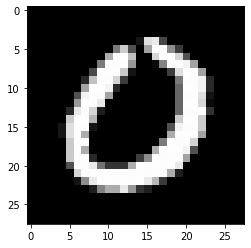

In [51]:
plt.imshow(X_train[np.random.random_integers(0, X_train.shape[0])], cmap='gray')

In [52]:
# Functional calls
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [55]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6075 - accuracy: 0.8415 - val_loss: 0.3095 - val_accuracy: 0.9166
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2858 - accuracy: 0.9182 - val_loss: 0.2381 - val_accuracy: 0.9344
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2328 - accuracy: 0.9333 - val_loss: 0.1996 - val_accuracy: 0.9424
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1984 - accuracy: 0.9427 - val_loss: 0.1801 - val_accuracy: 0.9500
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1734 - accuracy: 0.9499 - val_loss: 0.1568 - val_accuracy: 0.9566
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1543 - accuracy: 0.9557 - val_loss: 0.1432 - val_accuracy: 0.9604
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1382 - accuracy: 0.9608 - val_loss: 0.1328 - val_accuracy:

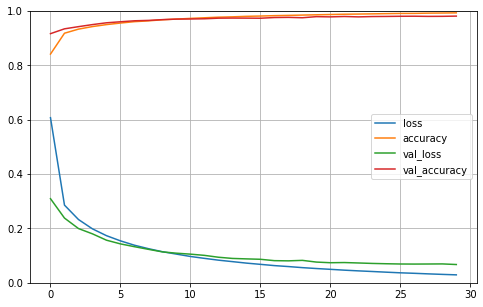

In [56]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()